In [1]:
import cooler
import matplotlib.pyplot as plt
import cooltools
import bioframe
import numpy as np
from cooltools.sandbox.reorder_cooler import reorder_cooler

In [2]:
# download test data
# this file is 145 Mb, and may take a few seconds to download
cool_file = cooltools.download_data("HFF_MicroC", cache=True, data_dir='./')    
print(cool_file)

./test.mcool


In [3]:
# Load a Hi-C map at a 1000kb resolution from a cooler file.
clr = cooler.Cooler('./test.mcool::/resolutions/1000000')

In [4]:
# Use bioframe to fetch the genomic features from the UCSC.
hg38_chromsizes = bioframe.fetch_chromsizes('hg38')
hg38_cens = bioframe.fetch_centromeres('hg38')
hg38_arms = bioframe.make_viewframe(bioframe.make_chromarms(hg38_chromsizes,  hg38_cens))
# View has to be bin-aligned!
hg38_arms = hg38_arms[hg38_arms.chrom.isin(clr.chromnames)].reset_index(drop=True)
hg38_arms[['start', 'end']] = (np.ceil(hg38_arms[['start', 'end']] / clr.binsize)*clr.binsize).astype(int)
hg38_arms

,chrom,start,end,name
0,chr2,0,94000000,chr2_p
1,chr2,94000000,243000000,chr2_q
2,chr17,0,25000000,chr17_p
3,chr17,25000000,84000000,chr17_q


In [5]:
new_view = hg38_arms.iloc[[0, 3, 1, 2]].reset_index(drop=True).copy()
new_view['new_chrom'] = ['fake_chrom1', 'fake_chrom1', 'fake_chrom2', 'fake_chrom2']
new_view = bioframe.trim(new_view, hg38_chromsizes)
new_view

,chrom,start,end,name,new_chrom
0,chr2,0,94000000,chr2_p,fake_chrom1
1,chr17,25000000,83257441,chr17_q,fake_chrom1
2,chr2,94000000,242193529,chr2_q,fake_chrom2
3,chr17,0,25000000,chr17_p,fake_chrom2


In [6]:
reorder_cooler(clr, new_view, 'test_reordered.cool')

/tungstenfs/scratch/ggiorget/ilya/Projects/cooltools/cooltools/sandbox/reorder_cooler.py:73: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  .apply(_adjust_start_end)


In [7]:
clr_new = cooler.Cooler('test_reordered.cool')

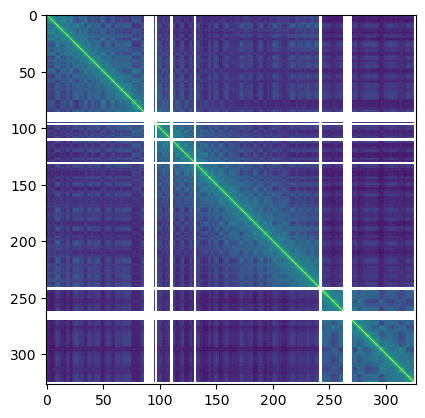

In [8]:
plt.imshow(np.log2(clr.matrix()[:]))

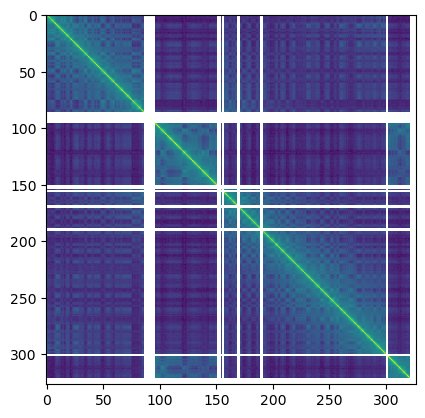

In [9]:
plt.imshow(np.log2(clr_new.matrix()[:]))

In [10]:
clr_new.chroms()[:]

,name,length
0,fake_chrom1,152257441
1,fake_chrom2,173193529


In [11]:
clr_new.bins()[:]

,chrom,start,end,weight
0,fake_chrom1,0,1000000,0.002441
1,fake_chrom1,1000000,2000000,0.002435
2,fake_chrom1,2000000,3000000,0.002728
3,fake_chrom1,3000000,4000000,0.001755
4,fake_chrom1,4000000,5000000,0.002474
...,...,...,...,...
322,fake_chrom2,168193529,169193529,NaN
323,fake_chrom2,169193529,170193529,0.003757
324,fake_chrom2,170193529,171193529,NaN
325,fake_chrom2,171193529,172193529,NaN
